# Figure 5: Genetic Validation

## Purpose
Validate biological meaningfulness through genetic associations and demonstrate genetic architecture of signatures.

## Panels Required:
- **Panel A:** PRS differences between disease subtypes
- **Panel B:** Manhattan plot of signature-specific genetic associations
- **Panel C:** Signature-modifying variants (genetic × signature interaction)
- **Panel D:** Genetic correlation network of signatures

## Key Message:
Demonstrate that signatures have heritable biological architecture


In [ ]:
# Setup
import sys
import os
sys.path.append('/Users/sarahurbut/aladynoulli2/pyScripts/new_oct_revision')

import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.dpi'] = 300

print("Setup complete")


In [1]:
%run /Users/sarahurbut/aladynoulli2/pyScripts/dec_6_revision/new_notebooks/main_paper_figures/generate_prs_signature_plots.py --batch_dir='/Users/sarahurbut/Library/CloudStorage/Dropbox/censor_e_batchrun_vectorized/' --output_dir='/Users/sarahurbut/aladynoulli2/pyScripts/dec_6_revision/new_notebooks/results/paper_figs/prs_signatures_corrected_E_PCS_SEX' --n_top 30

Output directory: /Users/sarahurbut/aladynoulli2/pyScripts/dec_6_revision/new_notebooks/results/paper_figs/prs_signatures_corrected_E_PCS_SEX
Loaded 36 PRS names from: /Users/sarahurbut/aladynoulli2/prs_names.csv

Loaded 36 PRS names
  First few: ['AAM', 'AMD', 'AD', 'AST', 'AF']

METHOD: Loading gamma from BATCH DIRECTORY (will average across batches)
Directory: /Users/sarahurbut/Library/CloudStorage/Dropbox/censor_e_batchrun_vectorized/
Pattern: enrollment_model_W0.0001_batch_*_*.pt
Found 40 batch checkpoints. Loading gamma...
  Loaded gamma from enrollment_model_W0.0001_batch_0_10000.pt (shape: (47, 21))
  Loaded gamma from enrollment_model_W0.0001_batch_100000_110000.pt (shape: (47, 21))
  Loaded gamma from enrollment_model_W0.0001_batch_10000_20000.pt (shape: (47, 21))
  Loaded gamma from enrollment_model_W0.0001_batch_110000_120000.pt (shape: (47, 21))
  Loaded gamma from enrollment_model_W0.0001_batch_120000_130000.pt (shape: (47, 21))
  Loaded gamma from enrollment_model_W0.000

Loading lead variants from /Users/sarahurbut/Library/CloudStorage/Dropbox-Personal/all_loci_annotated.tsv...
Loaded 151 lead variants across 16 signatures

Checking for novel loci (not in component trait GWAS) - Signature 5 only...
  Loaded 25 loci from Angina_pectoris_ukb_eur_regenie_af1.sig.lead.sumstats.txt
  Loaded 63 loci from Coronary_atherosclerosis_ukb_eur_regenie_af1.sig.lead.sumstats.txt
  Loaded 41 loci from Hypercholesterolemia_ukb_eur_regenie_af1.sig.lead.sumstats.txt
  Loaded 28 loci from Myocardial_infarction_ukb_eur_regenie_af1.sig.lead.sumstats.txt
  Loaded 1 loci from Other_acute_and_subacute_forms_of_ischemic_heart_disease_ukb_eur_regenie_af1.sig.lead.sumstats.txt
  Loaded 26 loci from Other_chronic_ischemic_heart_disease,_unspecified_ukb_eur_regenie_af1.sig.lead.sumstats.txt
  Total component trait loci: 184
  Signature 5: 10 novel, 46 known loci

  Examples of novel Sig 5 loci:
    FNDC3B          rs1499813       LOG10P=  9.94
    HYOU1           rs2509121       LO

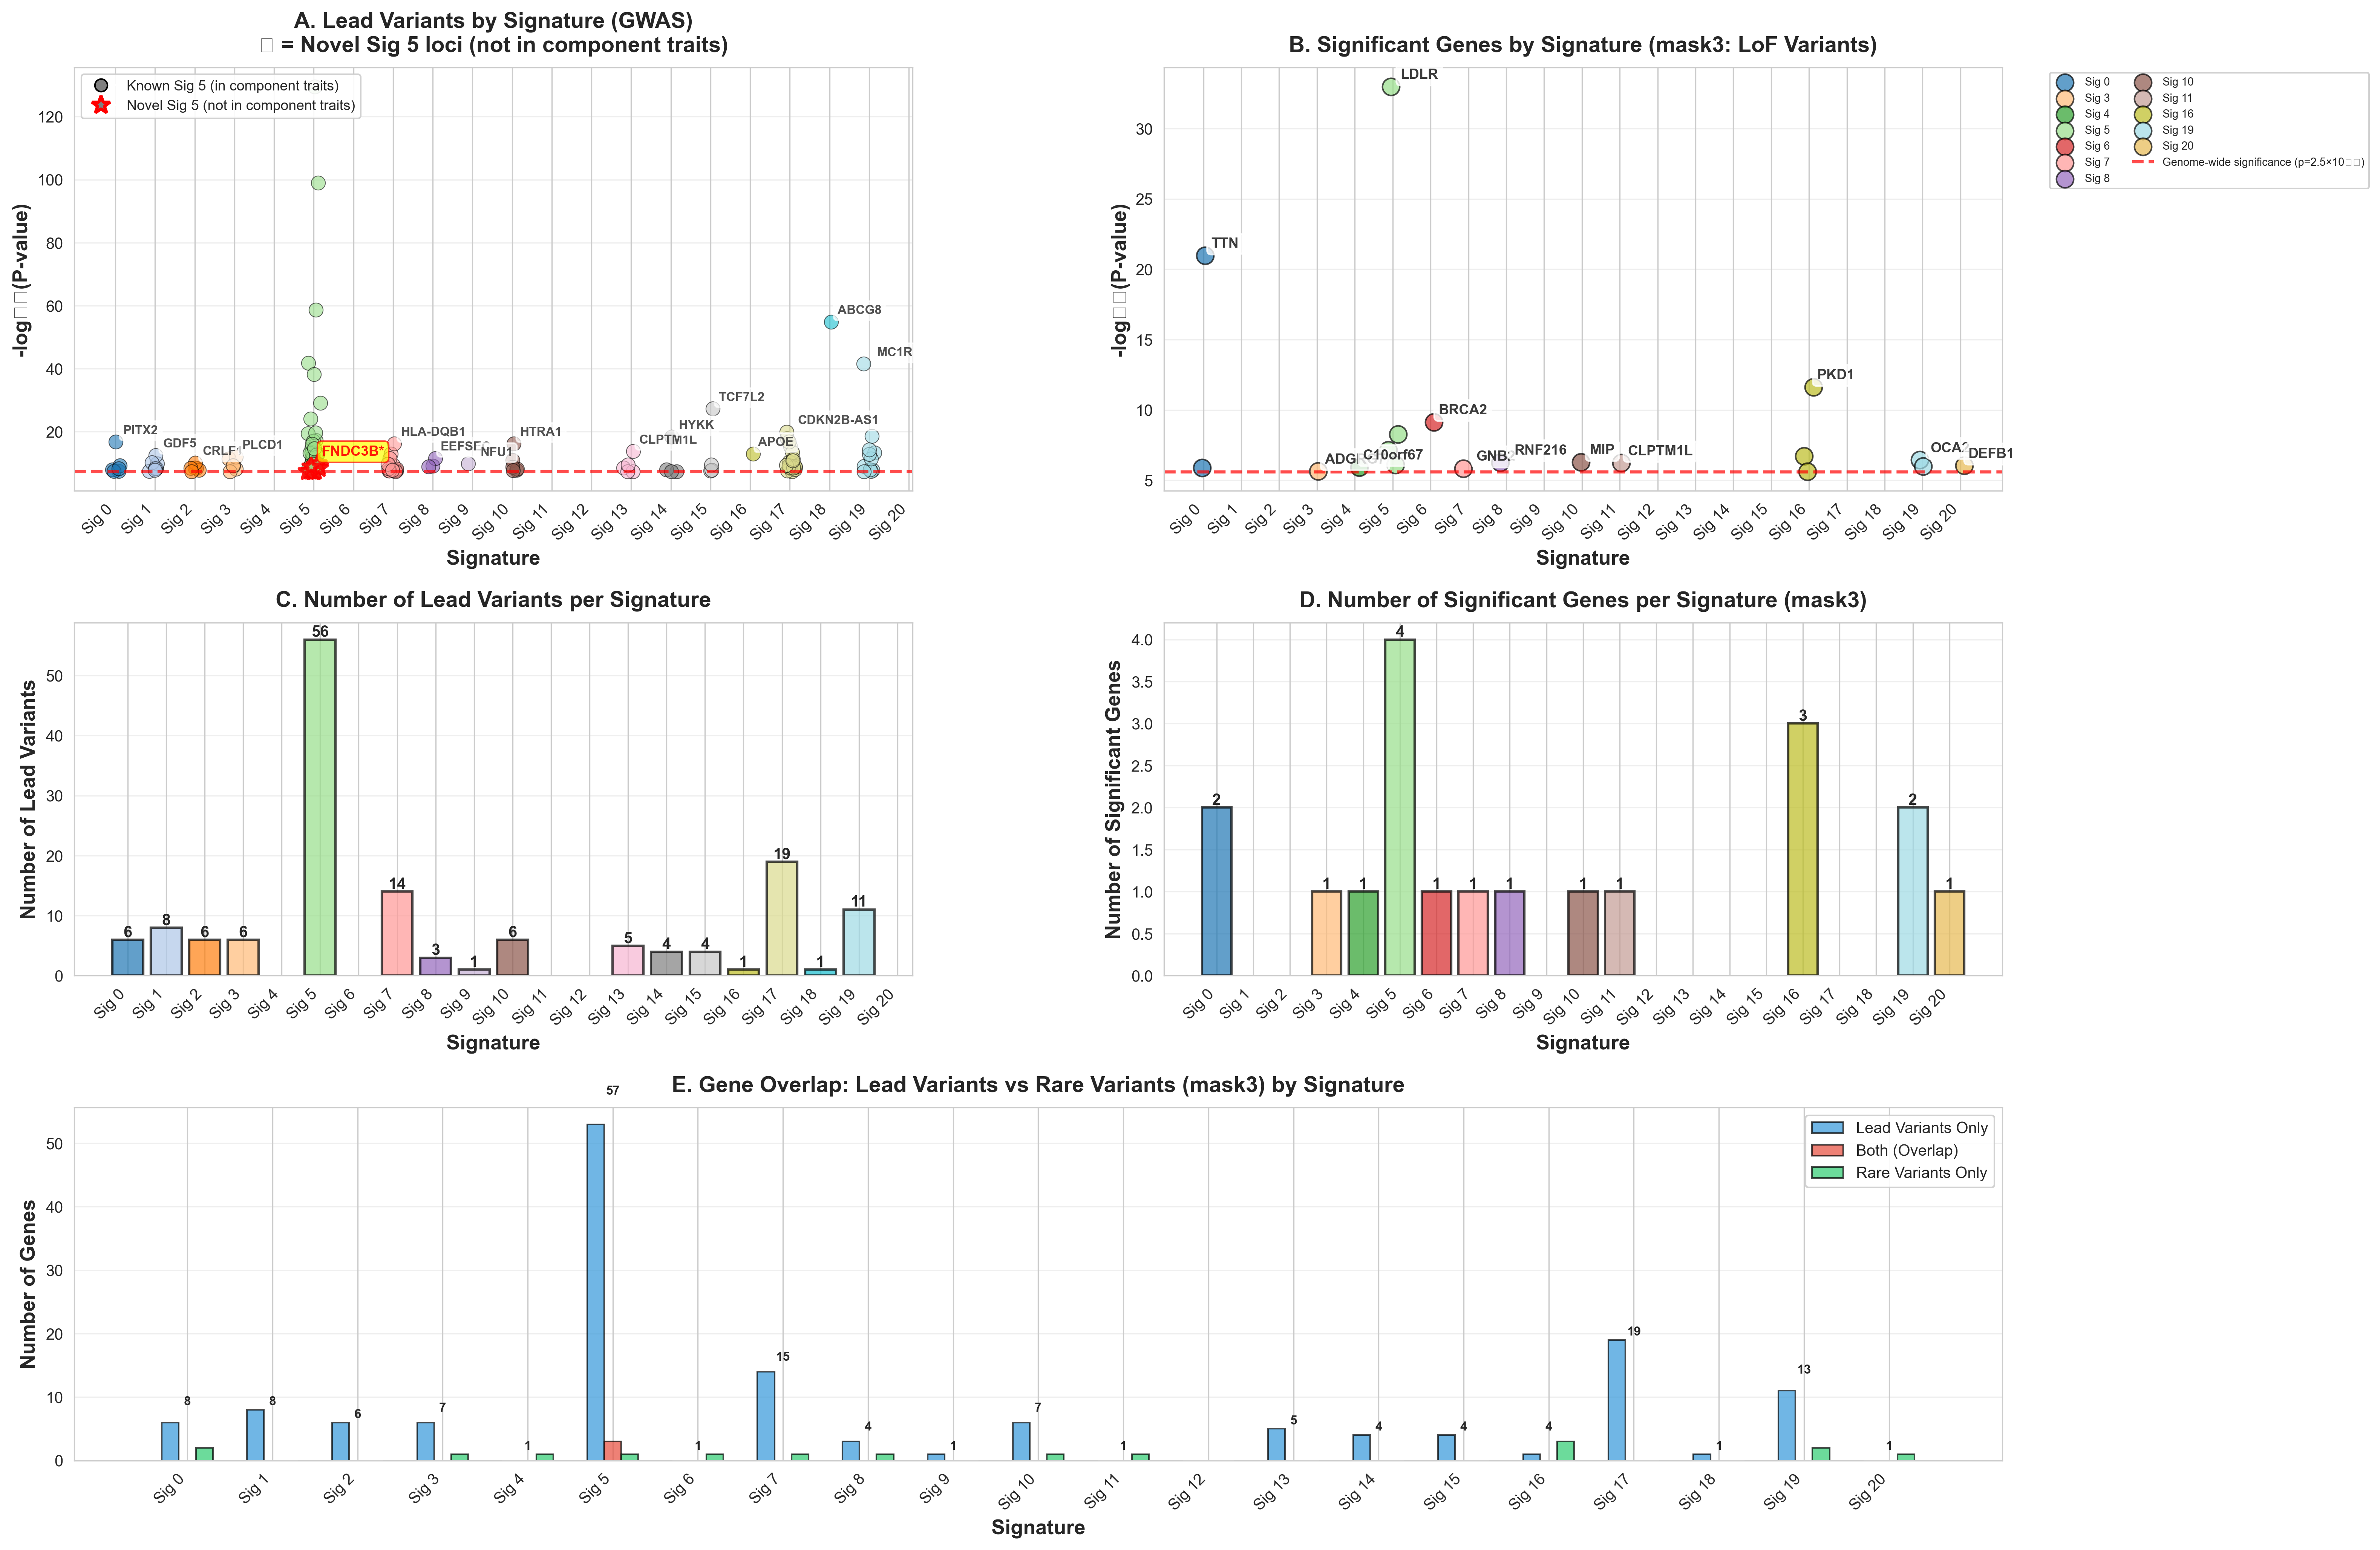


SUMMARY STATISTICS

Lead Variants (GWAS):
  Total variants: 151
  Unique signatures: 16
  Signature 5 - Novel loci (not in component traits): 10 (17.9%)
  Signature 5 - Known loci (in component traits): 46 (82.1%)
  Mean -log10(P) per signature:
    Signature 0: 9.53 (6 variants)
    Signature 1: 9.14 (8 variants)
    Signature 2: 8.45 (6 variants)
    Signature 3: 9.56 (6 variants)
    Signature 5: 16.87 (56 variants, 10 novel, 46 known)
    Signature 7: 9.29 (14 variants)
    Signature 8: 9.88 (3 variants)
    Signature 9: 9.84 (1 variants)
    Signature 10: 9.96 (6 variants)
    Signature 13: 9.31 (5 variants)
    Signature 14: 10.25 (4 variants)
    Signature 15: 13.05 (4 variants)
    Signature 16: 13.01 (1 variants)
    Signature 17: 11.11 (19 variants)
    Signature 18: 54.90 (1 variants)
    Signature 19: 13.78 (11 variants)

Rare Variants (mask3, gene-based):
  Total significant gene-signature associations: 19
  Unique genes: 18
  Unique signatures: 12
  Mean -log10(P) per si

In [7]:
%run /Users/sarahurbut/aladynoulli2/pyScripts/dec_6_revision/new_notebooks/reviewer_responses/notebooks/R1/visualize_genetic_loci.py

In [5]:
%run /Users/sarahurbut/aladynoulli2/pyScripts/dec_6_revision/new_notebooks/reviewer_responses/notebooks/R1/check_loci_uniqueness.py

ANALYSIS OF all_loci_annotated.tsv

Total rows (variants): 151
Total unique signatures: 16

Unique locus_id values: 121
Rows per unique locus_id:
  Mean: 1.25
  Median: 1
  Max: 8
  Loci with >1 variant: 19

Examples of loci with multiple variants:

  Locus ID 43 (8 variants):
    SIG13  NOTCH4          LOG10P=  9.48 rs2071278
    SIG15  BTNL2           LOG10P=  9.48 rs3806155
    SIG17  HLA-F           LOG10P=  9.26 rs3094560

  Locus ID 56 (4 variants):
    SIG10  CDKN2B-AS1      LOG10P=  7.73 rs7866783
    SIG17  CDKN2B-AS1      LOG10P= 19.93 rs4977575
    SIG19  CDKN2B-AS1      LOG10P=  7.37 rs7027950

  Locus ID 115 (3 variants):
    SIG19  PIGU            LOG10P= 18.60 rs910873
    SIG1   GDF5            LOG10P= 12.53 rs143384
    SIG5   GGT7            LOG10P=  7.74 rs6119534

  Locus ID 85 (3 variants):
    SIG17  ATXN2           LOG10P=  8.84 rs35350651
    SIG5   ATXN2           LOG10P= 11.85 rs10774625
    SIG7   SH2B3           LOG10P= 12.95 rs3184504

  Locus ID 38 (3 vari